<img src="https://raw.githubusercontent.com/sirineBS/DataScience-Funda/master/DS-funda-lab1/images/logo_avanade.png" style="width:60%;height:60%;">

# Data Science Fundamentals Training (06|04|2021)

## Lab 1: Data preparation for house price prediction

## Step1- Import the required libraries

In [0]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import random

#used in correlation
import scipy.stats as ss
import numpy as np
import itertools

## Step2- Load data - Dataset of houses
**Target variable :** 
- **SalePrice** : the property's sale price in dollars. This is the target variable that you'll try to predict in lab2.</br>

**Features :**
- **MSZoning**: Identifies the general zoning classification of the sale.
- **GrLivArea**: Above grade (ground) living area square feet.
- **Utilities**: Type of utilities available.
- **OverallQual**: Rates the overall material and finish of the house.
- **YearBuilt**: Original construction date.
- **TotalBsmtSF**: Total square feet of basement area.
- **Heating**: Type of heating.
- **HeatingQC**: Heating quality and condition.
- **CentralAir**: Central air conditioning.
- **FullBath**: Full bathrooms above grade.
- **BedroomAbvGr**: Bedrooms above grade (does NOT include basement bedrooms)
- **KitchenAbvGr**: Kitchens above grade
- **GarageCars**: Size of garage in car capacity.
- **PoolArea**: Pool area in square feet.

In [0]:
# Load the data
data = pd.read_csv('/dbfs/FileStore/tables/train_custom.csv')
print("Number of houses in our Dataset : ", data.shape[0])
print("Number of features : ", data.shape[1]-1)#the -1 is for not counting the Target SalePrice

Number of houses in our Dataset : 1459
Number of features : 14

In [0]:
# Display a sample (first 5 rows)
data.head()

Out[3]:

,MSZoning,GrLivArea,Utilities,OverallQual,YearBuilt,TotalBsmtSF,Heating,HeatingQC,CentralAir,FullBath,BedroomAbvGr,KitchenAbvGr,GarageCars,PoolArea,SalePrice
0,RL,1710,AllPub,7,2003,856,GasA,Ex,Y,2,3,1,2,0,208500
1,RL,1262,AllPub,6,1976,1262,GasA,Ex,Y,2,3,1,2,0,181500
2,RL,1786,AllPub,7,2001,920,GasA,Ex,Y,2,3,1,2,0,223500
3,RL,1717,AllPub,7,1915,756,GasA,Gd,Y,1,3,1,3,0,140000
4,RL,2198,AllPub,8,2000,1145,GasA,Ex,Y,2,4,1,3,0,250000


## Step3- Check overall quality of data
- Are there missing data
- Are values consistent
- Categorical / Continious features

In [0]:
# Get info on type, number of missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 MSZoning 1459 non-null object
 1 GrLivArea 1459 non-null int64 
 2 Utilities 1459 non-null object
 3 OverallQual 1459 non-null int64 
 4 YearBuilt 1459 non-null int64 
 5 TotalBsmtSF 1459 non-null object
 6 Heating 1459 non-null object
 7 HeatingQC 1379 non-null object
 8 CentralAir 1459 non-null object
 9 FullBath 1459 non-null int64 
 10 BedroomAbvGr 1459 non-null int64 
 11 KitchenAbvGr 1459 non-null int64 
 12 GarageCars 1459 non-null int64 
 13 PoolArea 1459 non-null int64 
 14 SalePrice 1459 non-null int64 
dtypes: int64(9), object(6)
memory usage: 171.1+ KB

In [0]:
# Check missing values
data.isna().sum().sort_values(ascending = False).head(20)

Out[5]: HeatingQC 80
SalePrice 0
PoolArea 0
GarageCars 0
KitchenAbvGr 0
BedroomAbvGr 0
FullBath 0
CentralAir 0
Heating 0
TotalBsmtSF 0
YearBuilt 0
OverallQual 0
Utilities 0
GrLivArea 0
MSZoning 0
dtype: int64

#### Categorical - Continious features : 
As you know, there are two types of features :<br>
- Continious (or quantitative)
- Catogorical (or qualitative)

**Continious data** is data which can take an infinite number of possible values; between two different values we can have a new value. Attributes such as cost, price, quantity are typically continious (integers or floats).<br><br>
**Categorical data** is data which takes on a finite number of possible values. 
<br>2 types of catergorical features : Ordinal (with order) and nominal. For example, if we are talking about a physical product like a t-shirt, it could have categorical variables such as:
- Size (X-Small, Small, Medium, Large, X-Large), where XS < S < M <L ==> Ordinal type
- Color (Red, Black, White), no order between theses types ==> nominal type

**Why need to check whether a variable is categorical or continuous?**</br>
- **Use different types of plots**
- **Convert char values to numerical :** Depending on the model that we'll use to predict the house price, we'll maybe need to convert character (String) values into numerical values, because the model requires to have numerical values in its input (technical constraint). To convert char values to numerical, we can choose **one-hot encoding** method, or simply **ordinal numbers** if the categorical feature is ordinal.

In [0]:
# What about continious or categorical features
categorical_features = [col for col in data.columns if data[col].dtype == 'object'] 
continuous_features = [col for col in data.columns if data[col].dtype != 'object']
target_col = 'SalePrice'
continuous_features.remove(target_col)

print('categorical features : ', categorical_features)
print('continuous features : ', continuous_features)

categorical features : ['MSZoning', 'Utilities', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir']
continuous features : ['GrLivArea', 'OverallQual', 'YearBuilt', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'PoolArea']

In [0]:
data.describe().T #by default The result will include numeric columns only.

Out[7]:

,count,mean,std,min,25%,50%,75%,max
GrLivArea,1459.0,1515.641535,525.616607,334.0,1129.0,1464.0,1777.5,5642.0
OverallQual,1459.0,6.100069,1.383171,1.0,5.0,6.0,7.0,10.0
YearBuilt,1459.0,1971.272104,30.212814,1872.0,1954.0,1973.0,2000.0,2010.0
FullBath,1459.0,1.565456,0.550906,0.0,1.0,2.0,2.0,3.0
BedroomAbvGr,1459.0,2.866347,0.816050,0.0,2.0,3.0,3.0,8.0
KitchenAbvGr,1459.0,1.046607,0.220410,0.0,1.0,1.0,1.0,3.0
GarageCars,1459.0,1.767649,0.747301,0.0,1.0,2.0,2.0,4.0
PoolArea,1459.0,2.760795,40.191018,0.0,0.0,0.0,0.0,738.0
SalePrice,1459.0,180944.102810,79464.918335,34900.0,129950.0,163000.0,214000.0,755000.0


In [0]:
# If need to check categorical values
data.describe(exclude=np.number).T 

Out[8]:

,count,unique,top,freq
MSZoning,1459,5,RL,1150
Utilities,1459,2,AllPub,1458
TotalBsmtSF,1459,707,,50
Heating,1459,6,GasA,1427
HeatingQC,1379,5,Ex,702
CentralAir,1459,2,Y,1364


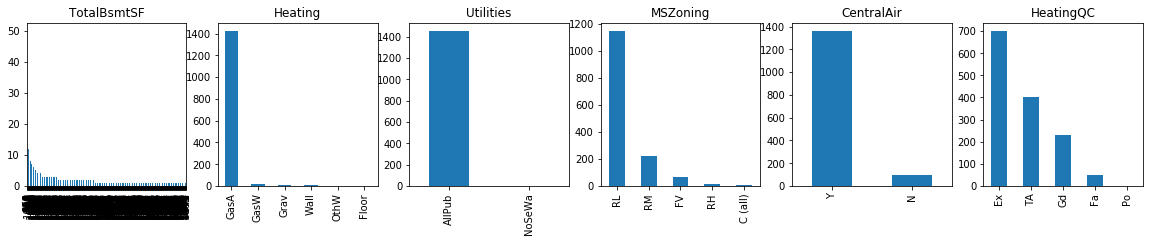

In [0]:
def plot_categorical(data, categorical_features_sample):
  fig, ax = plt.subplots(ncols = len(categorical_features_sample), figsize=(20,3))
  for i, categorical_feature in enumerate(data[categorical_features_sample]):
      data[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
  fig.show()
  
column_subset = random.sample(range(0, len(categorical_features)), len(categorical_features))
categorical_features_sample = [categorical_features[i] for i in column_subset]


plot_categorical(data, categorical_features_sample)

**Observations : **</br>
- **TotalBsmtSF** seems to be continious, example where filtering on object type to get the subset of categorical features does not work perfectly, need to double check with the business meaning of the feature (Check with PO to validate).</br>
- **Utilities** looks like constant -> may not bring too much info during the modeling
- **For categorical values, check with business the values consistency and meaning**

In [0]:
# TotalBsmtSF should be a float, let's convert it to float
data_cleaned = data.copy()
# data_cleaned['TotalBsmtSF'] = pd.to_numeric(data_cleaned['TotalBsmtSF'])

In [0]:
# strip : remove whitespace at the begining and the end of strings
data_cleaned[categorical_features] = data_cleaned[categorical_features].apply(lambda x: x.str.strip())
data_cleaned['TotalBsmtSF'] = pd.to_numeric(data_cleaned['TotalBsmtSF'])

In [0]:
data_cleaned.dtypes # TotalBsmtSF has now float type

Out[12]: MSZoning object
GrLivArea int64
Utilities object
OverallQual int64
YearBuilt int64
TotalBsmtSF float64
Heating object
HeatingQC object
CentralAir object
FullBath int64
BedroomAbvGr int64
KitchenAbvGr int64
GarageCars int64
PoolArea int64
SalePrice int64
dtype: object

In [0]:
# Update categorical and continuous features list
categorical_features.remove('TotalBsmtSF')
continuous_features.append('TotalBsmtSF')

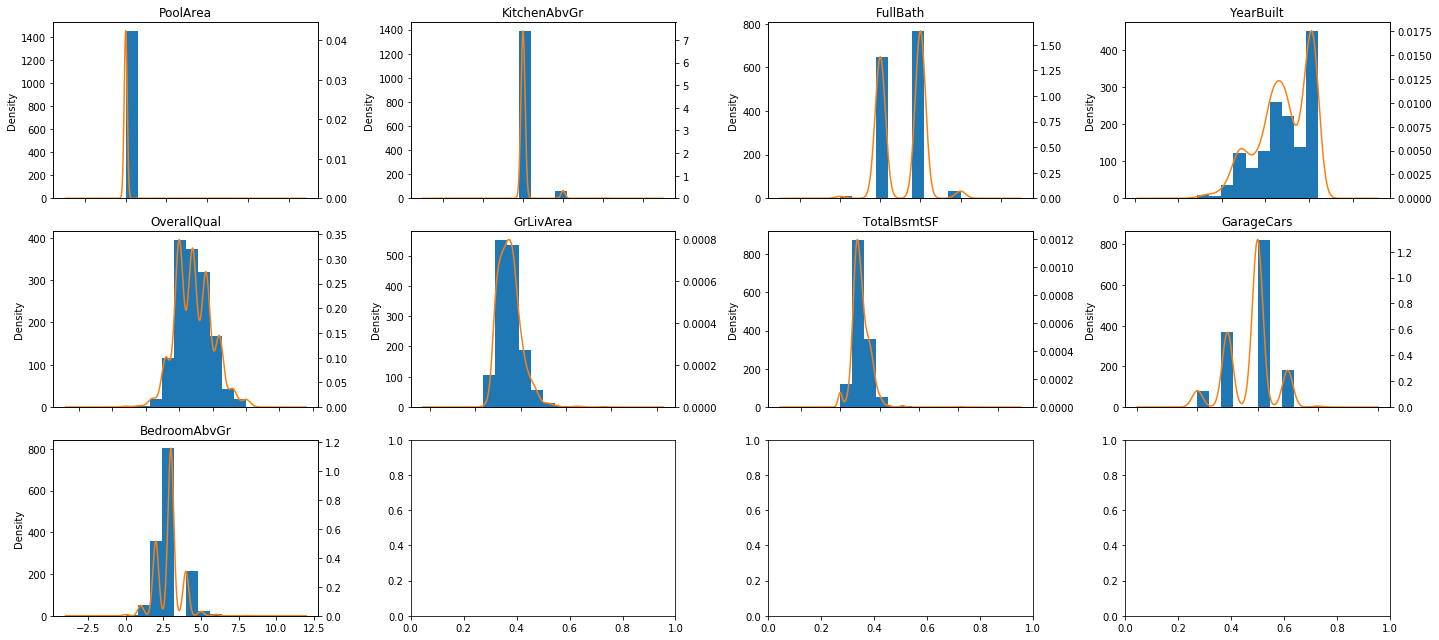

In [0]:
# https://stackoverflow.com/questions/43638851/pandas-histogram-plot-with-kde
def plot_continuous(data, continuous_features_sample):
  k = len(data[continuous_features_sample].columns)
  n = 4
  m = (k - 1) // n + 1
  fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
  for i, (name, col) in enumerate(data[continuous_features_sample].iteritems()):
      r, c = i // n, i % n
      ax = axes[r, c]
      col.hist(ax=ax)
      ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
      ax2.set_ylim(0)

  fig.tight_layout()

column_subset_cont = random.sample(range(0, len(continuous_features)),  len(continuous_features))
continuous_features_sample = [continuous_features[i] for i in column_subset_cont]
plot_continuous(data_cleaned, continuous_features_sample)

**Observations : **</br>
- Some features 'continious' are in fact most likely to be categorical: KitchenAbvGr, Fullbath , Poolarea, GarageCars.</br>
- Pay attention to non ordinal categorical variables, if they are expressed in numbers they should be one-hot encoded

In [0]:
for c in ['KitchenAbvGr', 'FullBath' , 'PoolArea', 'GarageCars']:
  print('Unique values of columns  : ',c ,  data_cleaned[c].unique())

Unique values of columns : KitchenAbvGr [1 2 3 0]
Unique values of columns : FullBath [2 1 3 0]
Unique values of columns : PoolArea [ 0 512 648 576 555 480 519 738]
Unique values of columns : GarageCars [2 3 1 0 4]

**Key take aways:** </br>
- Whether or not a variable is categorical depends on its application. Since we only have 3 colors of shirts, then that is a good categorical variable. However, “color” could represent thousands of values in other situations so it would not be a good choice.<br> **So there is no hard and fast rule for how many values a categorical value should have. You should apply your domain knowledge to make that determination on your own data sets.**
- Depending on the model used to make the house price prediction, we may need or not to convert categorical variables into numerical (one-hot, ordinal number). For example **a linear regression requires numerical values** in input, while **a decision trees accept to have string values.**

## Step4: Data exploration

#### What about relationship between a feature and the target? 
Goal : gain some intuition

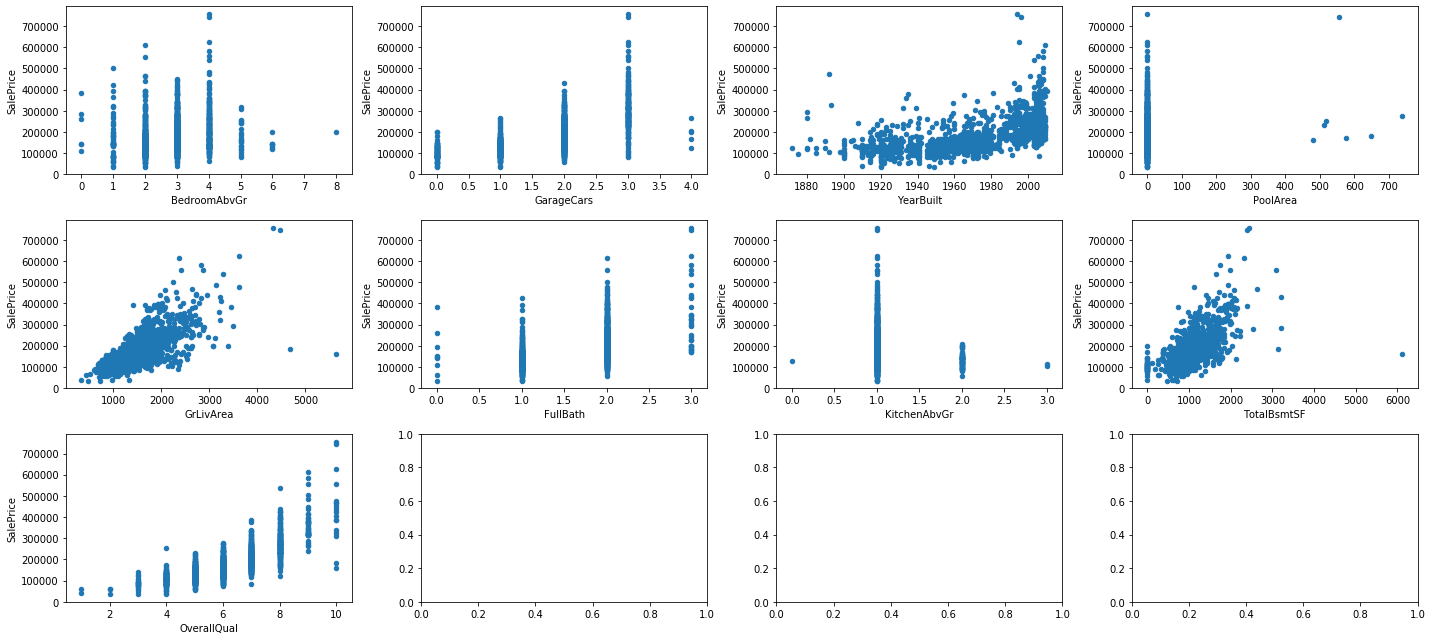

In [0]:
# continuous 
def plot_scatter(data, continuous_features_sample, target_col):
  k = len(data[continuous_features_sample].columns)
  n = 4
  m = (k - 1) // n + 1
  fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
  for i, (name, col) in enumerate(data[continuous_features_sample].iteritems()):
      r, c = i // n, i % n
      ax = axes[r, c]
      col.hist(ax=ax)
      data_ = pd.concat([data[target_col], col], axis=1)
      ax2 = data_.plot.scatter(x=name, y=target_col, ax=ax)
      ax2.set_ylim(0)

  fig.tight_layout()
  
column_subset_cont = random.sample(range(0, len(continuous_features)),  len(continuous_features))
continuous_features_sample = [continuous_features[i] for i in column_subset_cont]
  
plot_scatter(data_cleaned, continuous_features_sample, target_col)

**Observation**
- The higher GrLivArea is, the higher the SalePrice is
- Some outliers GrLivArea (>4500 : high GrLivarea, low price)
- Same behaviour for yearBuilt, iverallqual, BedroomAbvGr, GarageCars, FullBath, TotalBsmt
- As seen previously, PoolArea is equal to 0 for the majority of the houses in the dataset (we may not consider this feature in the modeling phase since it will not bring too much info to the model, and consider to add it in next versions if we see a variability in new data)

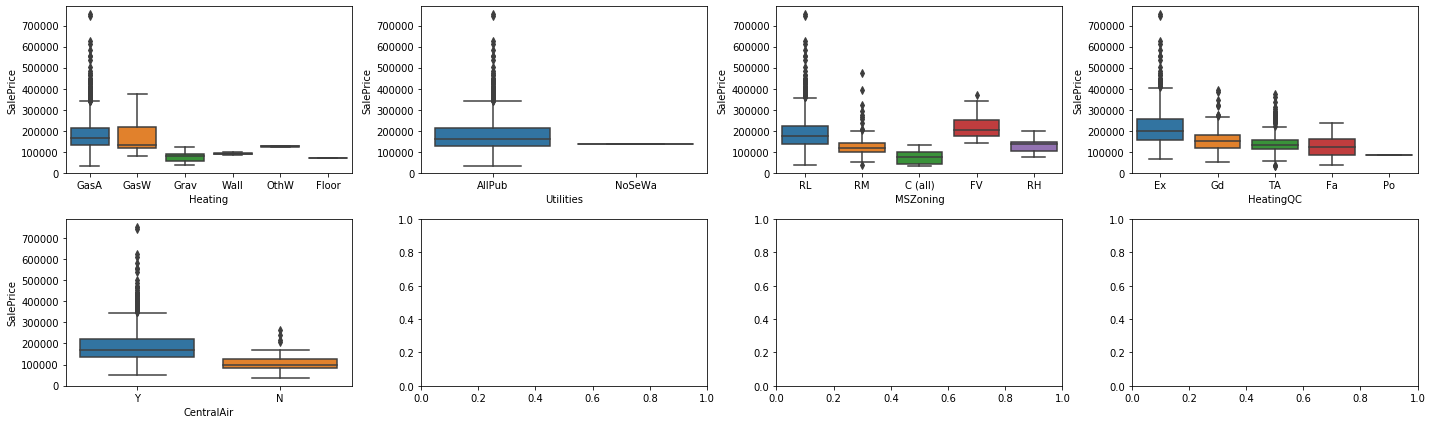

In [0]:
# Categorical
column_subset = random.sample(range(0, len(categorical_features)), len(categorical_features))
categorical_features_sample = [categorical_features[i] for i in column_subset]

def plot_boxplot(data_cleaned, categorical_features_sample, target_col):
  k = len(data_cleaned[categorical_features_sample].columns)
  n = 4
  m = (k - 1) // n + 1
  fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
  for i, (name, col) in enumerate(data_cleaned[categorical_features_sample].iteritems()):
      r, c = i // n, i % n
      ax = axes[r, c]
      # col.hist(ax=ax)
      data_ = pd.concat([data_cleaned[target_col], col], axis=1)
      ax2 = sns.boxplot(ax=ax, x=name, y=target_col, data=data_)
      #ax2.set_ylim(0)

  fig.tight_layout()
  
plot_boxplot(data_cleaned, categorical_features_sample, target_col) 

**Observation:**
- Some categorical features seems to have an influence on the house price : </br>
eg. houses with HeatingQC Ex tend to have a higher price than houses with a heating Fa.</br>
eg. houses in the MSZoning FV tend to be more expensive than houses with MSZoning C.

#### Are there correlation between continuous features
Goal : Detect highly correlated features that could have influence on the training phase :
- Speed time of training by removing redundant information : Two highly correlated variables, that have an impact on the price, bring the same info.
- Make the isolation of the impact of one variable on the target harder to represente : A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable. When the model receive in input two highly correleated variable, it make it difficult to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.

The most basic idea of correlation is "as one variable increases, does the other variable increase (positive correlation), decrease (negative correlation), or stay the same (no correlation)" with a scale such that perfect positive correlation is +1, no correlation is 0, and perfect negative correlation is -1. <br>
Just like the month-of-the-year is correlated with the average daily temperature, and the hour-of-the-day is correlated with the amount of light outdoors. <br>
The most commonly used mathematical defintion of correlation between continious features is **Pearson's R** which result in a range of [-1,1]</br>
<img src="https://raw.githubusercontent.com/sirineBS/DataScience-Funda/master/DS-funda-lab1/images/pearson_correlation.PNG" style="width:400px;height:90px">
<br>Pearson's R works well for calculation correlation between two continious features, we'll se later an alternative for the correlation between categorical features

Out[18]:

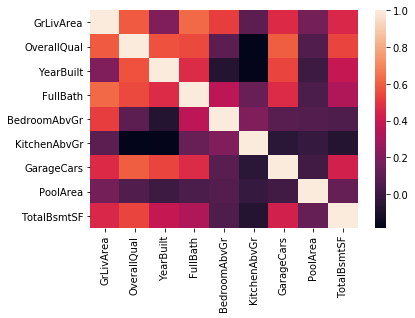

<matplotlib.axes._subplots.AxesSubplot at 0x7fadd0dedad0>

In [0]:
corr = data_cleaned[continuous_features].corr()#by default pearson
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**Observation**
- No high correlation seen (arround +/-0.8)
- Small correlation between Fullbath and overallQual (0.6), Fullbath and GLivArea(0.55), that do not require to remove one these variables.

### Correlation between categorical features 
As seen before the Pearson's R correlation is a good indicator for continious features while for categorical features we do not have integer values to do the calculation.
<br>To solve this issue, we can imagine converting categorical feature into intergers and then use Pearson's R correlation expression. And one of the method to convert categorical values into integers is to use the **one-hot encoding** transformation function (or also called dummies). The one-hot encoding transformation, will transform a categorical feature size which has for example 3 possibile values (S,M,L) into 3 binary features (Size_S, Size_M, Size_L).
<br>Using one-hot encoding technique result usually on a number of features pretty much bigger than the initial one, while each value correspond to a column. 
<br> One-hot encoding is very useful and we'll use later on the training, but use it to observe correlation make the observation impossible because of the number of features. 
<br>So an alernative to Pearson's R for categorical features is **Cramer’s V** . 
<br>Cramers'V is based on Pearson's chi-squared statistic and use this expression (if you want to know more about it https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)
<img src="https://raw.githubusercontent.com/sirineBS/DataScience-Funda/master/DS-funda-lab1/images/cramersv.PNG" style="width:400px;height:90px;">

*If you want to know more about correlation in general*<br>
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient<br>
https://stats.stackexchange.com/questions/119835/correlation-between-a-nominal-iv-and-a-continuous-dv-variable/124618#124618<br>
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

Out[19]:

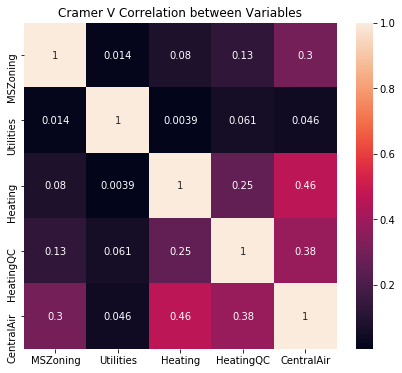

Text(0.5, 1, 'Cramer V Correlation between Variables')

In [0]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]#Chi-square test of independence of variables in a contingency table.
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    return np.sqrt(phi2/min((k-1),(r-1)))

def correlation_matrix(cols, data):
    corrM = np.zeros((len(cols),len(cols)))
    for col1, col2 in itertools.combinations(cols, 2):
        idx1, idx2 = cols.index(col1), cols.index(col2)
        corrM[idx1, idx2] = cramers_v(data[col1], data[col2])
        corrM[idx2, idx1] = corrM[idx1, idx2]
    for i in range(len(cols)):
        corrM[i,i]=1
    corr = pd.DataFrame(corrM, index=cols, columns=cols)
    return corr

cols = categorical_features
corr= correlation_matrix(cols, data)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables")

**Observation**
- No obvious correlation between categorical features

## Step5- Data completion
Goal : Complete missing values, because models don't like Nan values.</br>

- Missing data completion is an important step. In a client context, need to be done with subject matter experts to adopt a coherent completion strategy. Multiple options are possible : ignore them, complet using mean, median, previous value, interpolation etc.

In [0]:
# We choose in this example to cmplete by mean
data_cleaned[categorical_features] = data_cleaned[categorical_features].fillna(data_cleaned[categorical_features].mode().iloc[0])
data_cleaned[continuous_features] = data_cleaned[continuous_features].fillna(data_cleaned[continuous_features].mean())

In [0]:
data_cleaned.isna().sum()

Out[21]: MSZoning 0
GrLivArea 0
Utilities 0
OverallQual 0
YearBuilt 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
FullBath 0
BedroomAbvGr 0
KitchenAbvGr 0
GarageCars 0
PoolArea 0
SalePrice 0
dtype: int64

In [0]:
# Save datacleaned in csv file to be used for modeling
data_cleaned.to_csv("/dbfs/FileStore/house_price_data_cleaned.csv")

In [0]:
# Check cleaned data file is save in Filestore
dbutils.fs.ls("./FileStore")

Out[23]: [FileInfo(path='dbfs:/FileStore/house_price_data_cleaned.csv', name='house_price_data_cleaned.csv', size=87592),
 FileInfo(path='dbfs:/FileStore/plots/', name='plots/', size=0),
 FileInfo(path='dbfs:/FileStore/tables/', name='tables/', size=0)]

## Global conclusion
- Garbage IN Garbage OUT : Before running through the modeling phase, it's important to take time to understand data, and clean it. 
- Loop with subject matter expert (SME), during missing data completion
- Share/question your insights with SME, it help you to gain business knowledge (when data and business are aligned), and detect inconsistency (when data and business are not aligned)